In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,roc_curve,auc, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import precision_score, recall_score, precision_recall_fscore_support
from sklearn.metrics import f1_score,precision_recall_curve
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
credit_data= pd.read_csv("creditcard.csv")

In [3]:
X= credit_data.drop('Class', axis= 1)
y= credit_data['Class']

In [4]:
#Feature EngineeringPowerTransformer
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='yeo-johnson', standardize=True)
df = power.fit_transform(X)

In [5]:
df= pd.DataFrame(data= df, columns= X.columns)
from imblearn.over_sampling import SMOTE
from collections import Counter
smt = SMOTE(random_state=2425, n_jobs=-1,sampling_strategy='auto', k_neighbors=5)
X_sm, y_sm = smt.fit_resample(df, y)
print('Resampled dataset shape {}'.format(Counter(y_sm)))
print('Before Resampled dataset shape {}'.format(Counter(y)))

Resampled dataset shape Counter({0: 52452, 1: 52452})
Before Resampled dataset shape Counter({0: 52452, 1: 153})


In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.30, random_state = 440)

In [7]:
pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)

In [8]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# AUC_CURVE

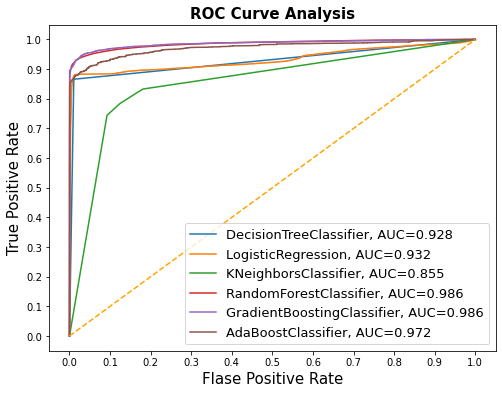

In [9]:
Z = [DecisionTreeClassifier() , LogisticRegression() , KNeighborsClassifier() ,
    RandomForestClassifier() , GradientBoostingClassifier(),AdaBoostClassifier()] 
X = ["DecisionTreeClassifier" , "LogisticRegression" , "KNeighborsClassifier" ,
    "RandomForestClassifier" , "GradientBoostingClassifier","AdaBoostClassifier"]
result_table = pd.DataFrame(columns=['Z', 'fpr','tpr','auc'])
for i in range(0,len(Z)):
    model = Z[i]
    model=model.fit( x_train , y_train )
    ypred = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  ypred)
    auc = roc_auc_score(y_test, ypred)
    result_table = result_table.append({'model':model.__class__.__name__,'fpr':fpr,'tpr':tpr,'auc':auc},ignore_index=True)
result_table.set_index('model', inplace=True)

fig = plt.figure(figsize=(8,6))
for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],result_table.loc[i]['tpr'],label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
plt.plot([0,1], [0,1], color='orange', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
plt.show()